#### Задание 1.

Подберите скорость обучения (alpha) и количество итераций для градиентного спуска.

#### Задание 2.

В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

```
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

*Начнем со второго задания, т.к. потом будем испольпользовать этот код. В выражении X * (y_pred - y) оператор * поэлементно перемножает строки матрицы X и вектора (y_pred - y), а нам нужно матричное перемножение. При матричном перемножении мы получаем вектор размерностью (1, 2), и функцию np.sum() к нему также применять не нужно:* 

In [4]:
n = X.shape[1]
alpha = 1e-4 
W = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
#     W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    W -= (alpha * (1/n * 2 * X @ (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796258
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889413
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178


*Можем убедиться, что код отрабатывает точно так же, как в коде с итерациями по весам:*

In [5]:
n = X.shape[1]
alpha = 1e-4 
W = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796256
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889416
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178


*Перейдем к заданию 1. Напишем функцию для градиентного спуска, которая возвращает вектор оценочных значений, вектор весов, а также массивы векторов весов и значения функции ошибки при итерациях градиентного спуска:*

In [6]:
def gradient_descent(X, y, alpha, iterations):
    
    W = np.array([1, 0.5])
    w_list = [W.copy()]
    errors = []
    n = X.shape[1]
    
    for i in range(iterations):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)

        old_W = W.copy()
        W -= (alpha * (1/n * 2 * X @ (y_pred - y)))

        w_list.append(W.copy())
        errors.append(err)

        if i % 100 == 0:
            print(i, W, err)

        if np.linalg.norm(W - old_W, ord=2) < 1e-10:
            y_pred = np.dot(W, X)
            errors.append(calc_mse(y, y_pred))
            print(i, W, err)
            break
        
    w_list = np.array(w_list)
    
    return y_pred, W, w_list, errors

*Попробуем подобрать максимальную скорость обучения. Для этого сначала подберем минимальную $\alpha$, при которой алгоритм градиентного спуска расходится:*

In [7]:
alpha = 7e-2

y_pred, W, _, _ = gradient_descent(X, y, alpha, 1000)

0 [ 8.714 24.3  ] 3173.15
100 [ 90145.66877384 487925.52597244] 3006560937495.409
200 [3.42406430e+09 1.85427696e+10] 4.342292800653102e+21
300 [1.30126711e+14 7.04691687e+14] 6.271453384410485e+30
400 [4.94528129e+18 2.67808092e+19] 9.057686655058878e+39
500 [1.87938409e+23 1.01776671e+24] 1.3081766300801919e+49
600 [7.14233298e+27 3.86787820e+28] 1.8893633227333563e+58
700 [2.71434246e+32 1.46993231e+33] 2.728755187341333e+67
800 [1.0315474e+37 5.5862695e+37] 3.941065639863221e+76
900 [3.92024973e+41 2.12298258e+42] 5.691972094002145e+85


*Теперь, немного уменьшив $\alpha$, подберем максимальную скорость обучения:*

In [8]:
alpha1 = 6e-2

y_pred, W, w_list1, errors1 = gradient_descent(X, y, alpha1, 1000)

0 [ 7.612 20.9  ] 3173.15
100 [47.16625286  3.92288138] 45.94015500316735
200 [47.23203786  3.91073367] 45.937500006742276
300 [47.23214269  3.91071432] 45.93750000000001
374 [47.23214286  3.91071429] 45.93749999999999


*Количество итераций для градиентного спуска подбирать не пришлось, т.к. оно оказалось меньше 1000. Алгоритм выходит из цикла по условию $||w^{k}-w^{k-1}|| < \varepsilon$, где $\varepsilon=10^{-10}$. Таким образом, количество итераций - 374*

*Представим на графике истинные значения и значения, предсказанные линейной регрессией:*

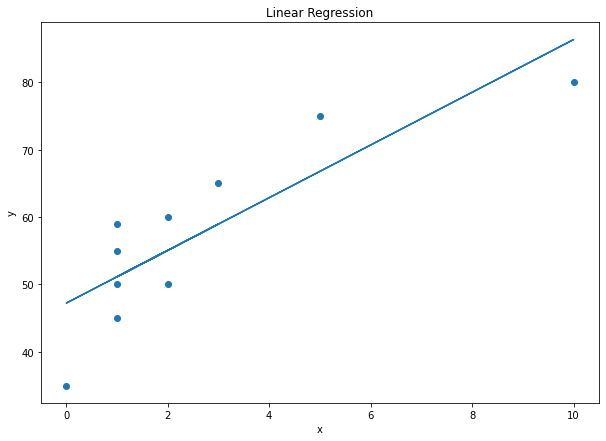

In [9]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(X[1], y)
plt.plot(X[1], W[0] + W[1] * X[1])
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*Теперь представим на графике изменения весов при градиентном спуске для двух различных скоростей обучения:*

In [10]:
# Истинное значение весов, вычисленное аналитически:
W_true = np.linalg.inv(np.dot(X, X.T)) @ X @ y

alpha2 = 3e-2
_, _, w_list2, errors2 = gradient_descent(X, y, alpha2, 10000)

0 [ 4.306 10.7  ] 3173.15
100 [45.43587625  4.24240866] 47.78566552757455
200 [47.15661983  3.92466019] 45.940767066883986
300 [47.22896753  3.91130063] 45.93750577530847
400 [47.23200935  3.91073894] 45.93750001020923
500 [47.23213724  3.91071532] 45.937500000018055
600 [47.23214262  3.91071433] 45.93750000000004
700 [47.23214285  3.91071429] 45.9375
738 [47.23214285  3.91071429] 45.937500000000014


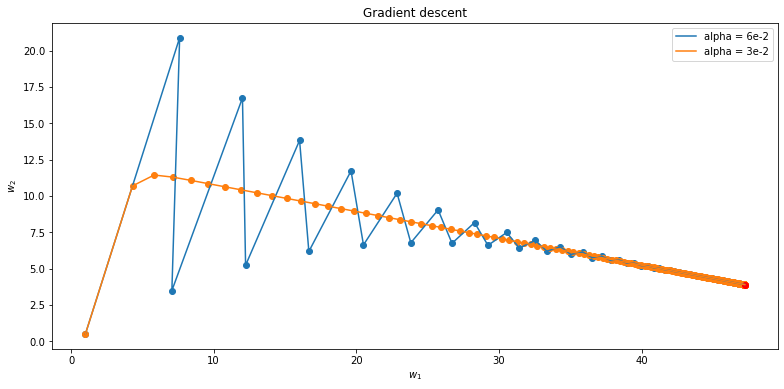

In [11]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list1[:, 0], w_list1[:, 1])
plt.scatter(W_true[0], W_true[1], c='r')
plt.plot(w_list1[:, 0], w_list1[:, 1], label="alpha = 6e-2")

plt.scatter(w_list2[:, 0], w_list2[:, 1])
plt.scatter(W_true[0], W_true[1], c='r')
plt.plot(w_list2[:, 0], w_list2[:, 1], label="alpha = 3e-2")

plt.legend()

plt.show()

*Видно, что при большей скорости обучения алгоритм сходится, но на грани устойчивости. Зато итераций при большей скорости обучения требуется гораздо меньше.*

*Теперь визуализируем изменение функции ошибки в зависимости от количества итераций. Для наглядности графиков ограничимся выводом первых 40 итераций:*

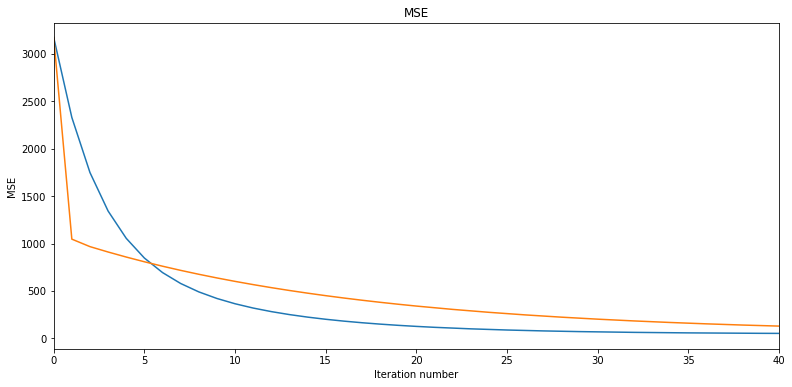

In [12]:
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors1)), errors1)
plt.plot(range(len(errors2)), errors2)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim([0, 40])
plt.show()

*Теперь визуализируем изменение весов при разных скоростях обучения на поверхности функции ошибки в 3-х мерном пространстве:*

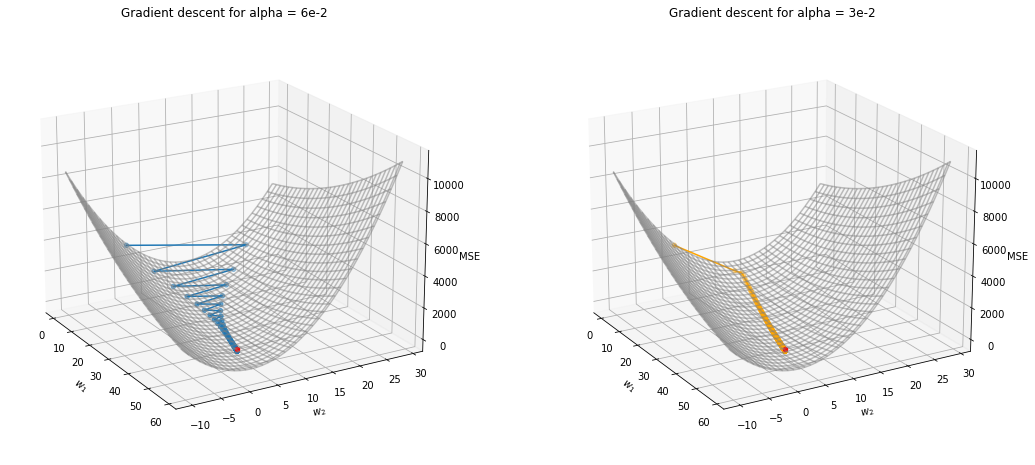

In [13]:
n = X.shape[1]

fig = figure(figsize=(18, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
W1 = np.arange(0, 60, 1)
W2 = np.arange(-10, 30, 1)
W1, W2 = np.meshgrid(W1, W2)
q = []
for i in range(n):
    q.append((W1 + W2 * X[1, i] - y[i])**2)
q = np.array(q)
Q = np.zeros((q.shape[1], q.shape[2]))
for i in range(n):
    Q += q[i]
Q = Q / n

ax.set_title('Gradient descent for alpha = 6e-2')
ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_zlabel('MSE')
ax.view_init(20, -30)

ax.plot_wireframe(W1, W2, Q, color='grey', alpha=0.5)
ax.scatter(w_list1[:, 0], w_list1[:, 1], errors1)
ax.scatter(W_true[0], W_true[1], np.mean((W_true[0] + W_true[1] * X - y)**2), c='r')
ax.plot(w_list1[:, 0], w_list1[:, 1], errors1)

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.set_title('Gradient descent for alpha = 3e-2')
ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_2$')
ax.set_zlabel('MSE')
ax.view_init(20, -30)

ax.plot_wireframe(W1, W2, Q, color='grey', alpha=0.5)
ax.scatter(w_list2[:, 0], w_list2[:, 1], errors2, c='orange')
ax.scatter(W_true[0], W_true[1], np.mean((W_true[0] + W_true[1] * X - y)**2), c='r')
ax.plot(w_list2[:, 0], w_list2[:, 1], errors2, c='orange')

show()